In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
 

df = pd.read_csv('World_Happiness_Report.csv')
 
for index, row in df.iterrows():
    columns_to_fill = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices', 'Perceptions Of Corruption']
 
    for column in columns_to_fill:
        #print(column)
        if df[column].isnull().any():
            df_missing = df[df[column].isnull()]
         
            df_clean = df.dropna(subset=[column])
         
            X_train = df_clean[['Year']]
            y_train = df_clean[column]
         
            model = LinearRegression()
         
            model.fit(X_train, y_train)
         
            X_missing = df_missing[['Year']]
         
            y_missing = model.predict(X_missing)
         
            df.loc[df[column].isnull(), column] = y_missing
 
print(df.head())

  Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2199 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2199 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2199 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

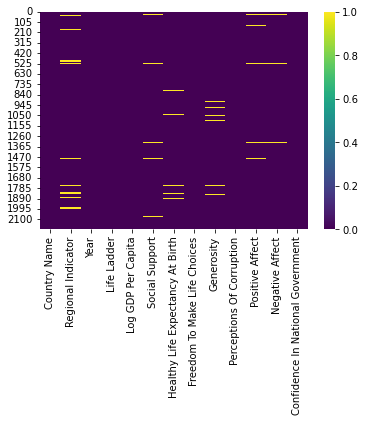

In [46]:
categorical_columns = ['Regional Indicator']
 
#imputer = SimpleImputer(strategy='most_frequent')
 
for column in categorical_columns:
     if df[column].isnull().any():
        imputer_column = df[column].values.reshape(-1, 1)
        #print(imputer_column)
         
        #imputed_values = imputer.fit_transform(imputer_column)
         
        #df[column] = imputed_values
 
#print(df)
 

df.info()
df.isnull().values

df.isna().values.sum()
df.isna().sum().sum()
missing_values = df.isnull()
missing_counts = missing_values.sum()
print(missing_counts)
sns.heatmap(missing_values, cmap='viridis')

df.describe()

df.columns

In [47]:
import re 

#get the unique values that are NA in regional

unique_values = []
df['R_checker'] = df['Regional Indicator'].isnull()

print(df['R_checker'])

for i,row in df.iterrows():
    #print
    #country = row['Country Name']
    if row['R_checker']==True:
        unique_values.append(row['Country Name'])
    
#values = np.array(unique_values)
holder = np.unique(unique_values)

#print the unique values
print(np.unique(unique_values))


0       False
1       False
2       False
3       False
4       False
        ...  
2194    False
2195    False
2196    False
2197    False
2198    False
Name: R_checker, Length: 2199, dtype: bool
['Angola' 'Belize' 'Bhutan' 'Central African Republic' 'Congo (Kinshasa)'
 'Cuba' 'Czechia' 'Djibouti' 'Eswatini' 'Guyana' 'Oman' 'Qatar' 'Somalia'
 'Somaliland region' 'South Sudan' 'State of Palestine' 'Sudan' 'Suriname'
 'Syria' 'Trinidad and Tobago' 'Turkiye']


In [48]:

#word finder function 

def WordFinder(word, text):
    pattern = r'(^|[^\w]){}([^\w]|$)'.format(word)
    pattern = re.compile(pattern, re.IGNORECASE)
    matches = re.search(pattern, text)
    return bool(matches)


reginFilled = []

#assign all the na values to a region
for i,row in df.iterrows():
    regins = row['Regional Indicator']
    country = row['Country Name']
    
    if WordFinder('African',country) == True:
        #print(country)
        regins = 'Sub-Saharan Africa'
        #print(regins)
        reginFilled.append(regins)
        #print(regins)
    #print(regins)
    
    elif WordFinder('sudan',country) == True:
        regins = 'Sub-Saharan Africa'
        reginFilled.append(regins)
        #print(regins)
    elif WordFinder('angola',country) == True:
        regins = 'Sub-Saharan Africa'
        #print(regins)
        reginFilled.append(regins)
    elif WordFinder('Belize',country) == True:
        regins = 'Latin America and Caribbean'
        #print(regins)
        reginFilled.append(regins)
        
    elif WordFinder('Bhutan',country) == True:
        regins = 'South Asia'
        #print(regins)
        reginFilled.append(regins)
    elif WordFinder('Congo',country) == True:
        #print(country)
        regins = 'Sub-Saharan Africa'
        #print(regins)
        reginFilled.append(regins)
    elif WordFinder('Cuba',country) == True:
        regins = 'Latin America and Caribbean'
        #print(regins)
        reginFilled.append(regins)
    elif WordFinder('Czechia',country) == True:
        regins = 'Western Europe'
        #print(regins)
        reginFilled.append(regins)   
        
    elif WordFinder('Djibouti',country) == True:
        regins = 'Middle East and North Africa'
        #print(regins)
        reginFilled.append(regins)   
    elif WordFinder('Eswatini',country) == True:
        regins = 'Sub-Saharan Africa'
        #print(regins)
        reginFilled.append(regins)        
    elif WordFinder('Guyana',country) == True:
        regins = 'Latin America and Caribbean'
        #print(regins)
        reginFilled.append(regins)   
    elif WordFinder('Oman',country) == True:
        regins = 'Middle East and North Africa'
        #print(regins)
        reginFilled.append(regins) 
        
    elif WordFinder('Qatar',country) == True:
        #print(country)
        regins = 'Middle East and North Africa'
        #print(regins)
        reginFilled.append(regins) 
        
    elif WordFinder('somalia',country) == True:
        regins = 'Sub-Saharan Africa'
        #print(regins)
        reginFilled.append(regins) 
        
    elif WordFinder('Somaliland',country) == True:
        regins = 'Sub-Saharan Africa'
        reginFilled.append(regins) 
        #print(reginFilled)
    elif WordFinder('Palestine',country) == True:
        regins = 'Middle East and North Africa'
        #print(regins)
        reginFilled.append(regins) 

        
    elif WordFinder('Suriname',country) == True:
        regins = 'Latin America and Caribbean'
        #print(regins)
        reginFilled.append(regins)   
    elif WordFinder('Syria',country) == True:
        regins = 'Middle East and North Africa'
        #print(regins)
        reginFilled.append(regins) 
    elif WordFinder('trinidad',country) == True:
        regins = 'Latin America and Caribbean'
        #print(regins)
        reginFilled.append(regins) 
    elif WordFinder('turkiye',country) == True:
        regins = 'Middle East and North Africa'
        #print(regins)
        reginFilled.append(regins)   
    else:
        reginFilled.append(regins)
        
#print(len(reginFilled))

df['Regional Indicator'] = reginFilled

#check to make sure count of  na is 0

df['Regional Indicator'].isna().sum()


        


0

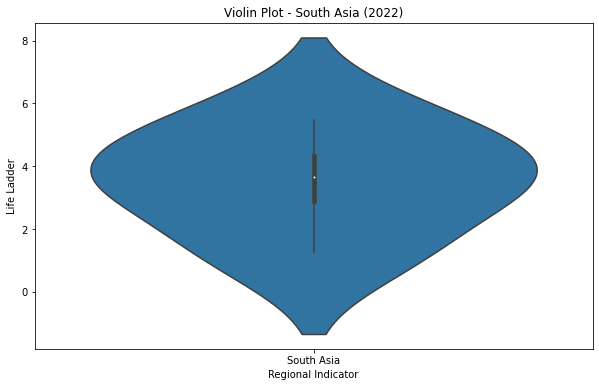

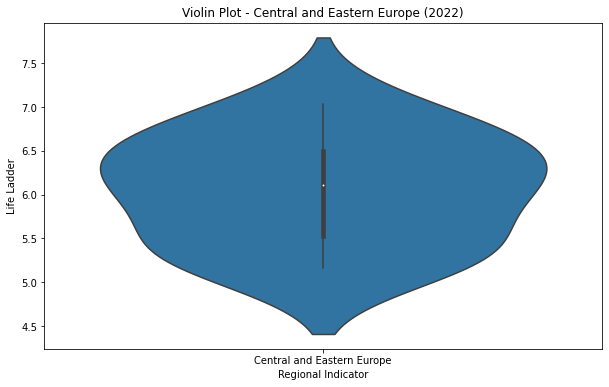

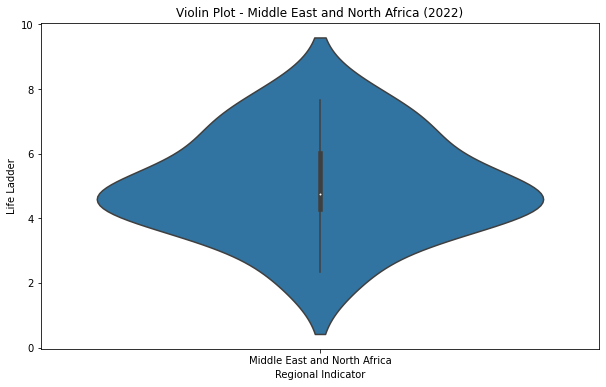

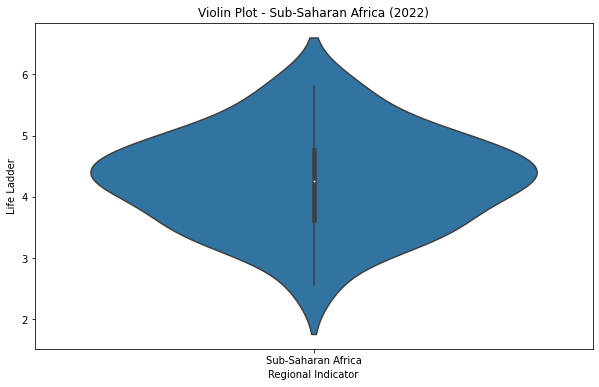

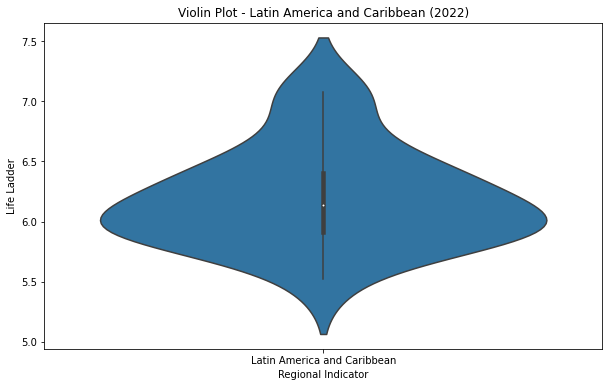

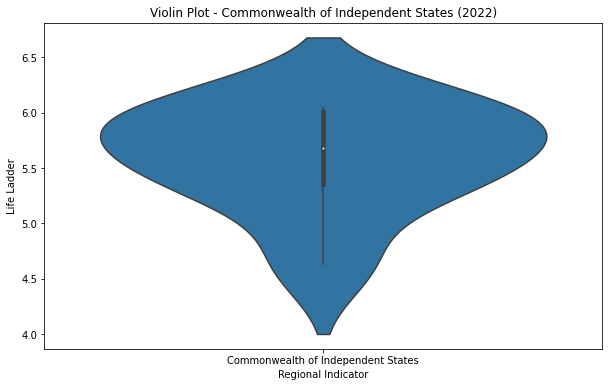

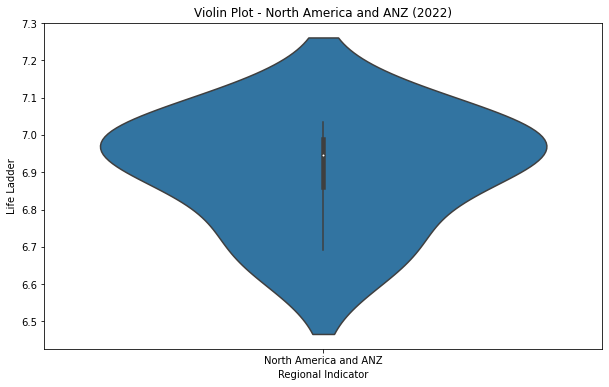

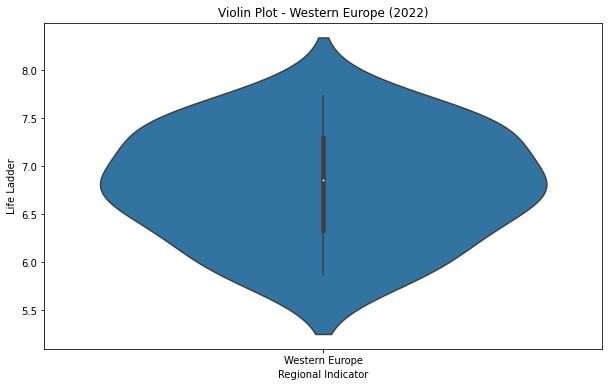

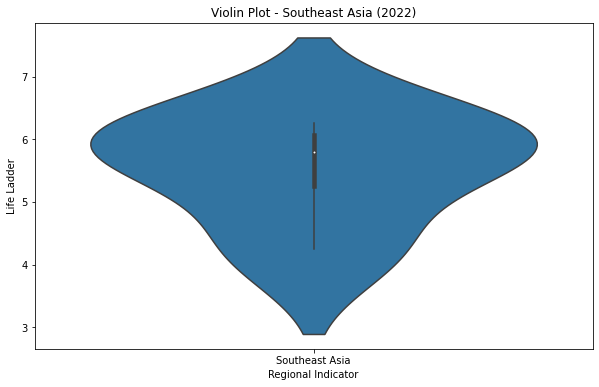

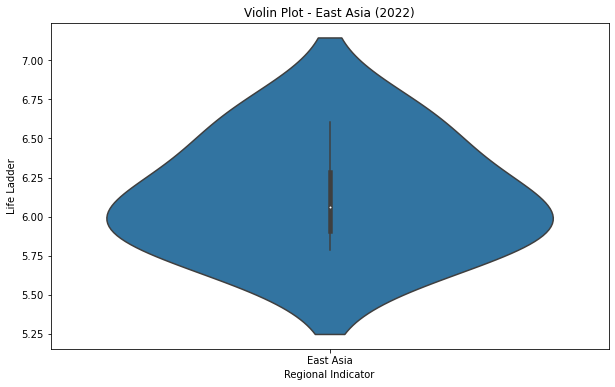

In [50]:
#i like all the plots -jv

import seaborn as sns

for regional_indicator in df['Regional Indicator'].unique():
    data_subset = df[(df['Regional Indicator'] == regional_indicator) & (df['Year'] == 2022)]
    
    if not data_subset.empty:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x='Regional Indicator', y='Life Ladder', data=data_subset)
        plt.title(f"Violin Plot - {regional_indicator} (2022)")
        plt.xlabel('Regional Indicator')
        plt.ylabel('Life Ladder')
        plt.show()
       

import plotly.graph_objects as go
import pandas as pd


fig = go.Figure()

for regional_indicator in df['Regional Indicator'].unique():
    data_subset = df[(df['Regional Indicator'] == regional_indicator) & (df['Year'] == 2022)]
    
    if not data_subset.empty:
        fig.add_trace(go.Violin(x=data_subset['Regional Indicator'],
                                y=data_subset['Life Ladder'],
                                name=regional_indicator,
                                box_visible=True,
                                meanline_visible=True))

fig.update_layout(title="Violin Plot - Life Ladder by Regional Indicator (2022)",
                  xaxis_title="Regional Indicator",
                  yaxis_title="Life Ladder")

fig.show()

In [63]:
#getting 3 countries by top GDP by region (maybe we move this?)-jv

grouped_data = df.groupby(['Year', 'Regional Indicator'])

top_countries_list = []

for index, (group_name, group_data) in enumerate(grouped_data, start=1):
    
    top_countries = group_data.nlargest(3, 'Log GDP Per Capita')
    
    
    top_countries_list.append((index, group_name[0], top_countries))

#print(top_countries_list)

#added if statment to just print out the 2022 
    
for index, year, top_countries in top_countries_list:
    if year ==2022:
        print(f"Index: {index}")
        print(f"Year: {year}")
        print(top_countries)
    #print(top_countries_list[0:1])

Index: 168
Year: 2022
     Country Name          Regional Indicator  Year  Life Ladder  \
1751     Slovenia  Central and Eastern Europe  2022     6.723398   
1154    Lithuania  Central and Eastern Europe  2022     7.037577   
609       Estonia  Central and Eastern Europe  2022     6.357114   

      Log GDP Per Capita  Social Support  Healthy Life Expectancy At Birth  \
1751           10.644165        0.941757                         71.224998   
1154           10.601837        0.937097                         67.750000   
609            10.571353        0.933333                         69.875000   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
1751                      0.930382    0.101481                   0.762208   
1154                      0.709662   -0.190842                   0.684991   
609                       0.903951    0.135742                   0.390301   

      Positive Affect  Negative Affect  Confidence In National Government  \
1751  

In [64]:
# sunburst plot for all
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Country Name', 'Regional Indicator', 'Year'],
    values='Life Ladder',
    color='Log GDP Per Capita',
    color_continuous_scale='Blues',
    hover_name='Country Name',
    hover_data=['Life Ladder', 'Log GDP Per Capita'],
    title='Life Ladder and Log GDP Per Capita by Country, Regional Indicator, and Year'
)

fig.show()

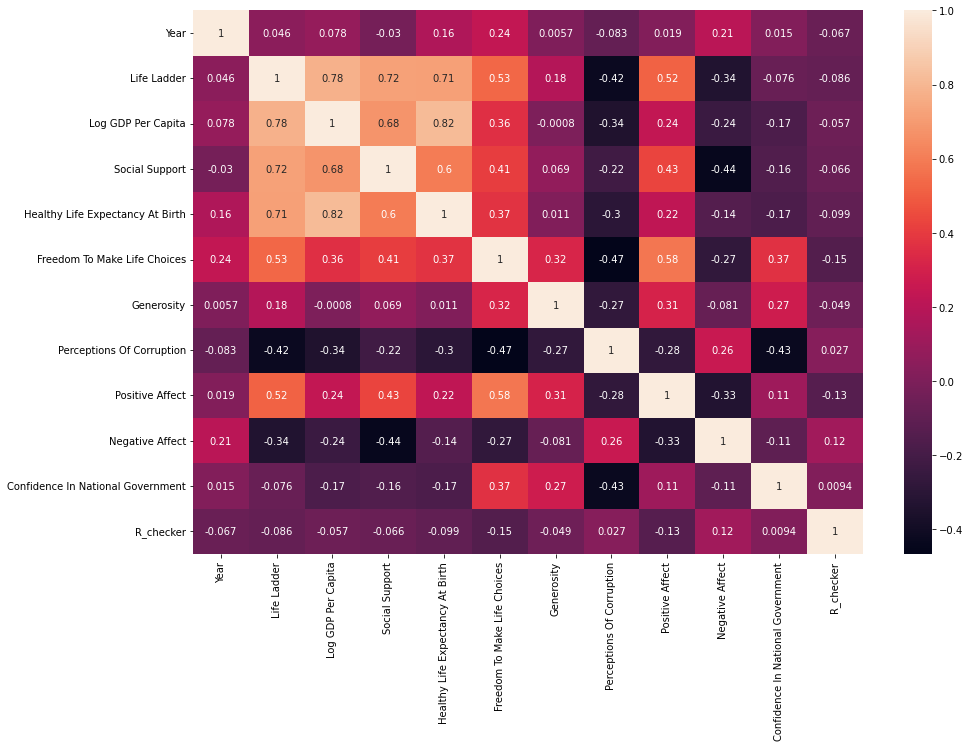

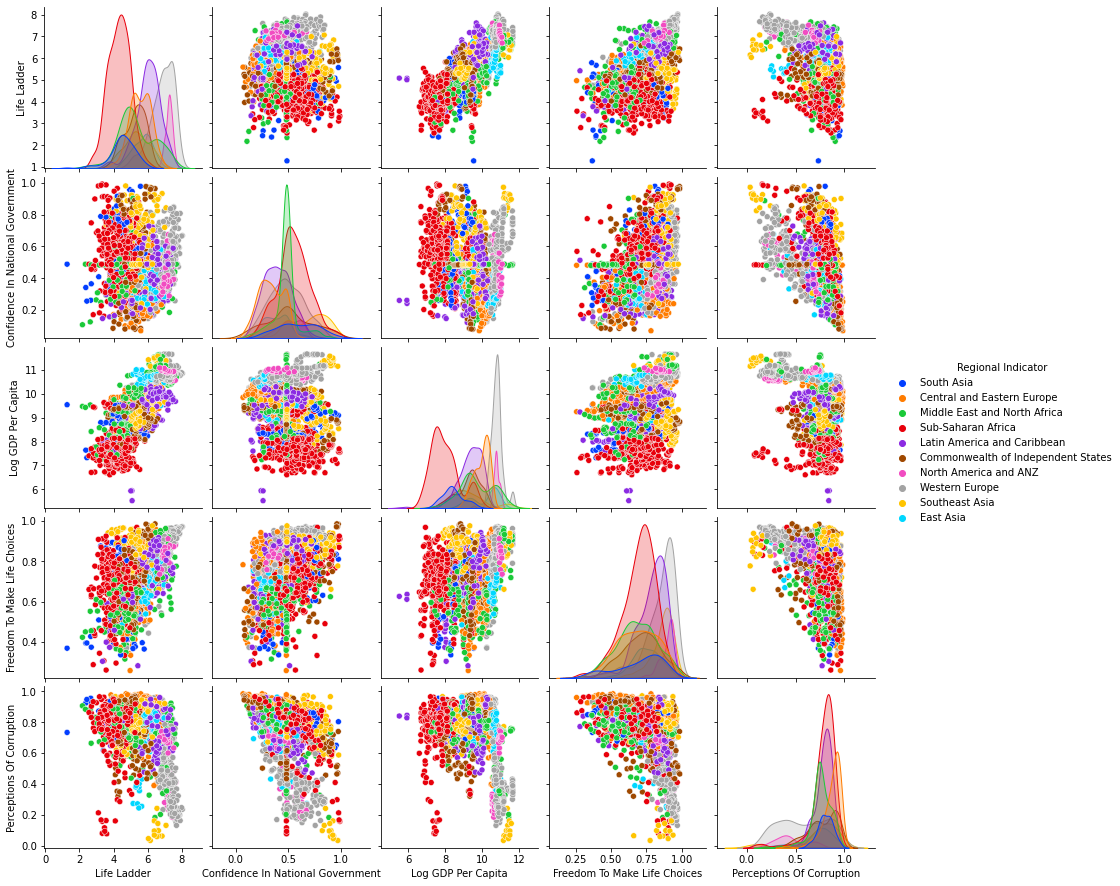

In [75]:
# Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cbar=True, annot=True)

# Pairplot

sns.pairplot(subplot, hue='Regional Indicator', palette='bright')
plt.show()